<a href="https://colab.research.google.com/github/bhavanisathish/MachineLearning/blob/master/Numbersclassificationusingmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from keras.datasets import mnist
from keras import layers
from keras.layers import *
from keras.models import *
from keras.utils import np_utils

In [53]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x = x_train
print("Number of x training examples",x_train.shape)
print("number of y training examples",y_train.shape)
print("Number of x testing example",x_test.shape)
print("number of y testing examples",y_test.shape)

X_train = x_train.reshape(x_train.shape[0],x_test.shape[1],x_test.shape[2],1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

print("after reshaping")
print("Number of x training examples",X_train.shape)
print("Number of x testing example",X_test.shape)


Number of x training examples (60000, 28, 28)
number of y training examples (60000,)
Number of x testing example (10000, 28, 28)
number of y testing examples (10000,)
after reshaping
Number of x training examples (60000, 28, 28, 1)
Number of x testing example (10000, 28, 28, 1)


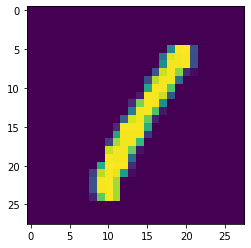

In [54]:
#visualizing the data
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x[3])
plt.show()

In [55]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))

# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 [==============================] - 37s 79ms/step - loss: 0.2051 - accuracy: 0.9404
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0564 - accuracy: 0.9833
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 6/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 7/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 8/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 9/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0054 - accuracy: 0.998

In [56]:
### START CODE HERE ### (1 line)

preds =  model.evaluate(x = X_test, y = Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.0636 - accuracy: 0.9848

Loss = 0.06364945322275162
Test Accuracy = 0.9847999811172485


In [92]:
import cv2
file = '/content/seven.jpg'
image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28,28))
image = 255-image  

image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255

In [93]:
pred = model.predict(image)

print(pred.argmax())

7
